In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
import json
from networkx import json_graph


In [6]:
df = pd.read_csv(r"C:\Users\jonas\OneDrive\Dokumente\Bachelor\Thesis Project\thesis_project_jonas\data\processed\edges.csv")
edges_truncated = pd.read_csv("C:/Users/jonas/OneDrive/Dokumente/Bachelor/Thesis Project/thesis_project_jonas/data/processed/edges_truncated.csv")
condensed_edges = pd.read_csv("C:/Users/jonas/OneDrive/Dokumente/Bachelor/Thesis Project/thesis_project_jonas/data/processed/condensed_edges.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464378 entries, 0 to 5464377
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Source            object 
 1   Target            object 
 2   arrivaldate       object 
 3   hscode            int64  
 4   valueofgoods_omu  float64
 5   volumeteu         float64
 6   weightkg          int64  
 7   dataset           object 
 8   source            object 
 9   target            object 
dtypes: float64(2), int64(2), object(6)
memory usage: 416.9+ MB


In [6]:
df.drop(columns=["dataset", "valueofgoods_omu"])

,Source,Target,arrivaldate,hscode,volumeteu,weightkg,source,target
0,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,2034-02-12,630630,0.0,4780,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.
1,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,2034-03-13,630630,0.0,6125,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.
2,AquaDelight Inc and Son's,-15045,2028-02-07,470710,0.0,10855,AquaDelight Inc and Son's,-15045
3,AquaDelight Inc and Son's,-15045,2028-02-23,470710,0.0,11250,AquaDelight Inc and Son's,-15045
4,AquaDelight Inc and Son's,-15045,2028-09-11,470710,0.0,11165,AquaDelight Inc and Son's,-15045
...,...,...,...,...,...,...,...,...
5464373,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,2034-12-25,304740,0.0,945,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee
5464374,Playa del Mar OJSC,Caracola de Coral CJSC,2034-12-26,845430,0.0,2170,Playa del Mar OJSC,Caracola de Coral CJSC
5464375,Playa del Mar OJSC,Caracola de Coral CJSC,2034-12-26,845430,0.0,2170,Playa del Mar OJSC,Caracola de Coral CJSC
5464376,Costa del Mar NV,Selous Game Reserve Kga,2034-12-28,160414,0.0,6710,Costa del Mar NV,Selous Game Reserve Kga


In [12]:
df = df.drop(columns=["Source", "Target", "volumeteu", "valueofgoods_omu", "dataset"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464378 entries, 0 to 5464377
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   arrivaldate  object
 1   hscode       int64 
 2   weightkg     int64 
 3   source       object
 4   target       object
dtypes: int64(2), object(3)
memory usage: 208.4+ MB


In [14]:
df.to_csv(r"C:\Users\jonas\OneDrive\Dokumente\Bachelor\Thesis Project\thesis_project_jonas\data\processed\edges_truncated.csv")

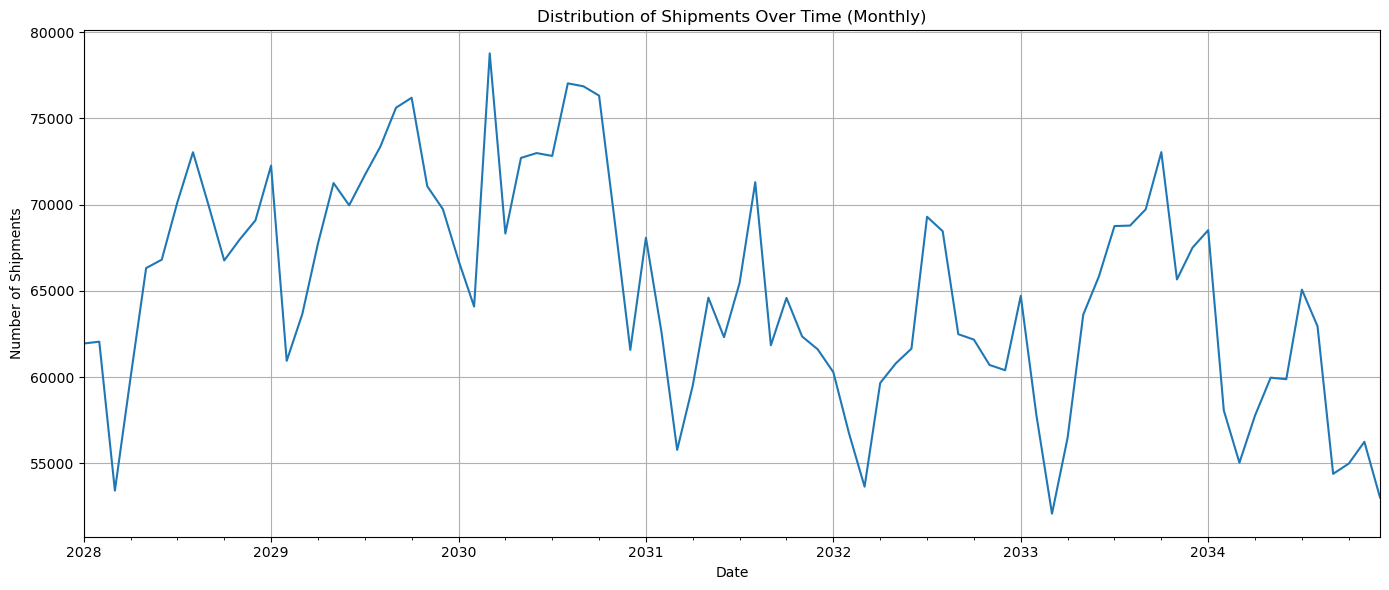

In [15]:
edges = pd.read_csv(r"C:\Users\jonas\OneDrive\Dokumente\Bachelor\Thesis Project\thesis_project_jonas\data\processed\edges_truncated.csv")

# Convert the 'arrivaldate' column to datetime
edges['arrivaldate'] = pd.to_datetime(edges['arrivaldate'])

# Group by month and count the number of shipments
monthly_shipments = edges.groupby(edges['arrivaldate'].dt.to_period("M")).size()

# Plot the distribution of shipments over time
plt.figure(figsize=(14,6))
monthly_shipments.plot()
plt.title("Distribution of Shipments Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Shipments")
plt.grid(True)
plt.tight_layout()
plt.show()

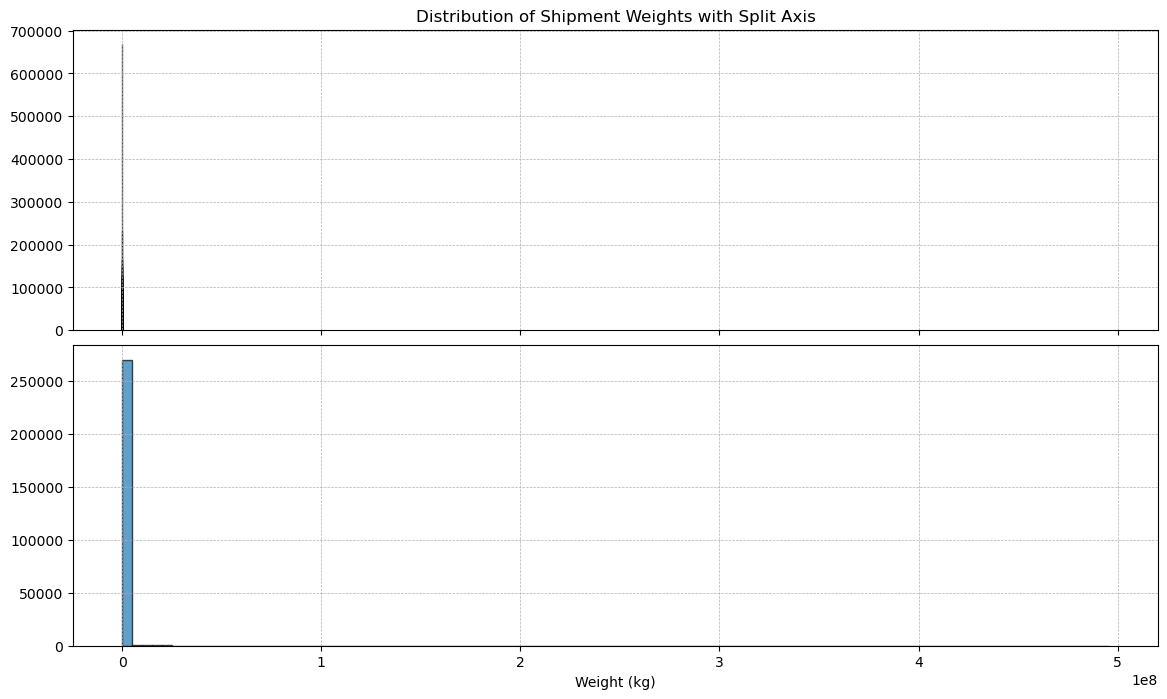

In [19]:
# Define the break points for the x-axis
break_point = edges['weightkg'].quantile(0.95)  # 95% quantile as the break point
max_value = edges['weightkg'].max()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8))

# Plotting the main distribution on the first axis
ax1.hist(edges['weightkg'], bins=100, range=(0, break_point), edgecolor='k', alpha=0.7)
ax1.set_title("Distribution of Shipment Weights with Split Axis")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting the outliers on the second axis
ax2.hist(edges['weightkg'], bins=100, range=(break_point, max_value), edgecolor='k', alpha=0.7)
ax2.set_xlabel("Weight (kg)")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting the layout and removing the space between the plots
plt.subplots_adjust(hspace=0.05)

plt.show()

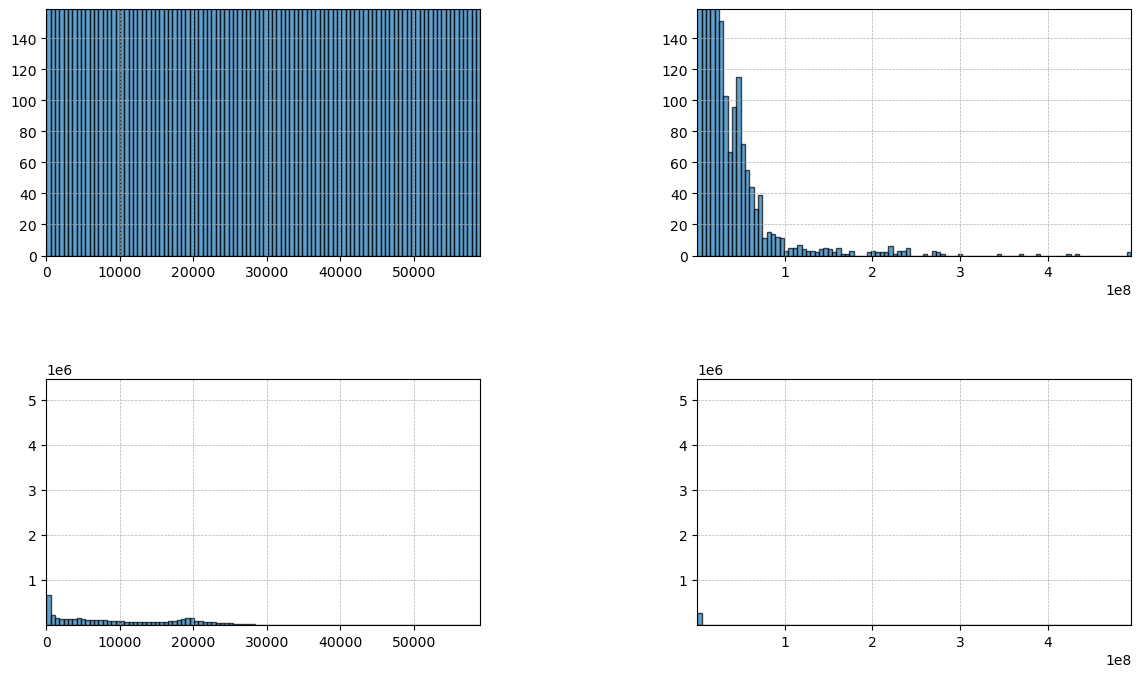

In [21]:
# Load the data
edges = pd.read_csv(r"C:\Users\jonas\OneDrive\Dokumente\Bachelor\Thesis Project\thesis_project_jonas\data\processed\edges_truncated.csv")

# Define the break points for the x-axis and y-axis
break_point_x = edges['weightkg'].quantile(0.95)  # 95% quantile as the x-axis break point
max_value_x = edges['weightkg'].max()

# Break point for y-axis based on frequencies
frequencies, _, _ = plt.hist(edges['weightkg'], bins=100)
break_point_y = np.percentile(frequencies, 95)  # 95% quantile as the y-axis break point
max_value_y = frequencies.max()
plt.close()

fig = plt.figure(figsize=(14, 8))

# Define the positions of the subplots
grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)

# Main distribution plot
ax_main = fig.add_subplot(grid[0, 0])
ax_main.hist(edges['weightkg'], bins=100, range=(0, break_point_x), edgecolor='k', alpha=0.7)
ax_main.set_xlim(0, break_point_x)
ax_main.set_ylim(0, break_point_y)
ax_main.grid(True, which='both', linestyle='--', linewidth=0.5)

# Outliers in x direction plot
ax_x_outliers = fig.add_subplot(grid[0, 1], sharey=ax_main)
ax_x_outliers.hist(edges['weightkg'], bins=100, range=(break_point_x, max_value_x), edgecolor='k', alpha=0.7)
ax_x_outliers.set_xlim(break_point_x, max_value_x)
ax_x_outliers.grid(True, which='both', linestyle='--', linewidth=0.5)

# Outliers in y direction plot
ax_y_outliers = fig.add_subplot(grid[1, 0], sharex=ax_main)
ax_y_outliers.hist(edges['weightkg'], bins=100, range=(0, break_point_x), edgecolor='k', alpha=0.7)
ax_y_outliers.set_xlim(0, break_point_x)
ax_y_outliers.set_ylim(break_point_y, max_value_y)
ax_y_outliers.grid(True, which='both', linestyle='--', linewidth=0.5)

# Outliers in both x and y direction plot
ax_both_outliers = fig.add_subplot(grid[1, 1], sharex=ax_x_outliers)
ax_both_outliers.hist(edges['weightkg'], bins=100, range=(break_point_x, max_value_x), edgecolor='k', alpha=0.7)
ax_both_outliers.set_xlim(break_point_x, max_value_x)
ax_both_outliers.set_ylim(break_point_y, max_value_y)
ax_both_outliers.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

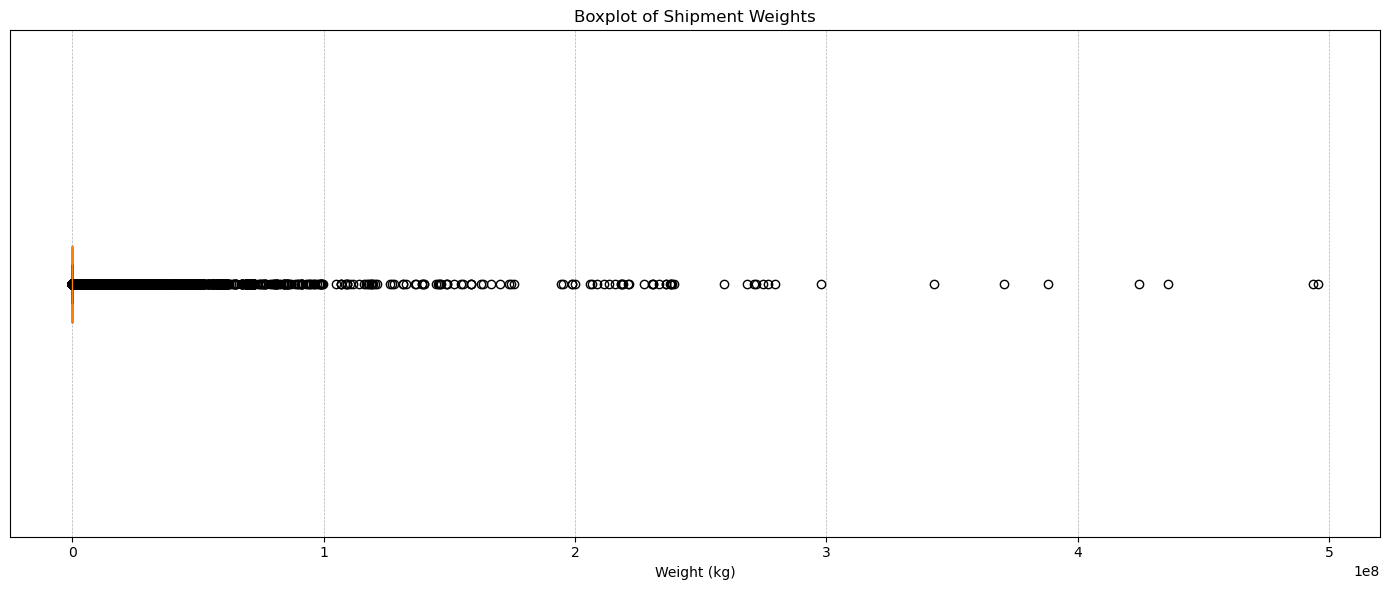

In [22]:
# Plot a boxplot of the shipment weights
plt.figure(figsize=(14,6))
plt.boxplot(edges['weightkg'], vert=False)
plt.title("Boxplot of Shipment Weights")
plt.xlabel("Weight (kg)")
plt.yticks([])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [23]:
# Count the number of shipments sent by each company (source)
top_senders = edges['source'].value_counts().head(10)

# Count the number of shipments received by each company (target)
top_receivers = edges['target'].value_counts().head(10)

top_senders, top_receivers

(Fresh Limited Liability Company               153363
 Uttar Pradesh s CJSC                          117216
 Chhattisgarh   Marine ecology A/S Delivery    112071
 French Crab S.p.A. Worldwide                   99659
 bǐ mù yú Sagl Distribution                     90000
 Coastal Cruisers Pic Shipping                  82129
 Mar y Luna Sagl                                77095
 Marine Masterminds Dry dock                    75130
 Caracola del Este Corporation Express          68683
 Zambezi Gorge  N.V. Transport                  66562
 Name: source, dtype: int64,
 hǎi dǎn Corporation Wharf                       456617
 Caracola del Sol Services                       192995
 Saltwater Supreme ОАО Forwading                 189435
 Costa de la Felicidad Shipping                  162402
 Panope Limited Liability Company                160961
 Mar del Este CJSC                               127853
 Sailors and Surfers Incorporated Enterprises    106595
 Coral Cove BV Delivery                

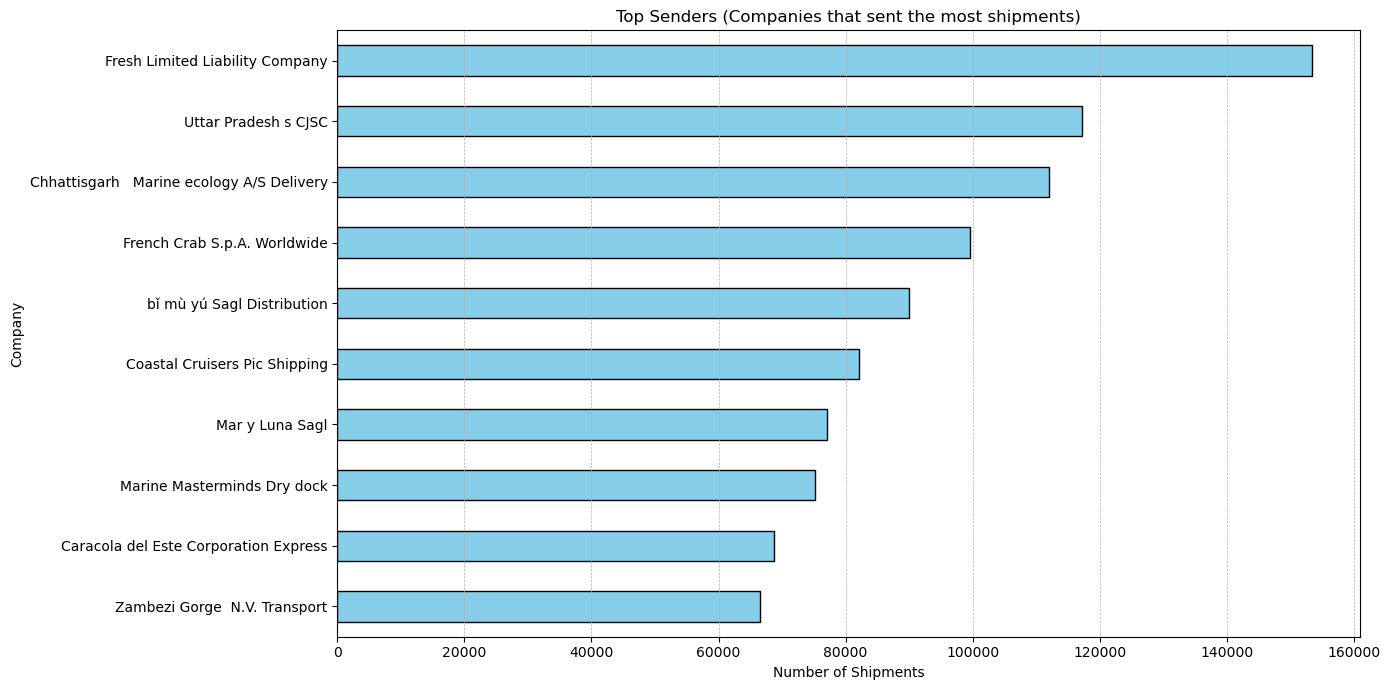

In [24]:
# Plotting the top senders
plt.figure(figsize=(14,7))
top_senders.plot(kind='barh', color='skyblue', edgecolor='k')
plt.title("Top Senders (Companies that sent the most shipments)")
plt.xlabel("Number of Shipments")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.tight_layout()
plt.show()

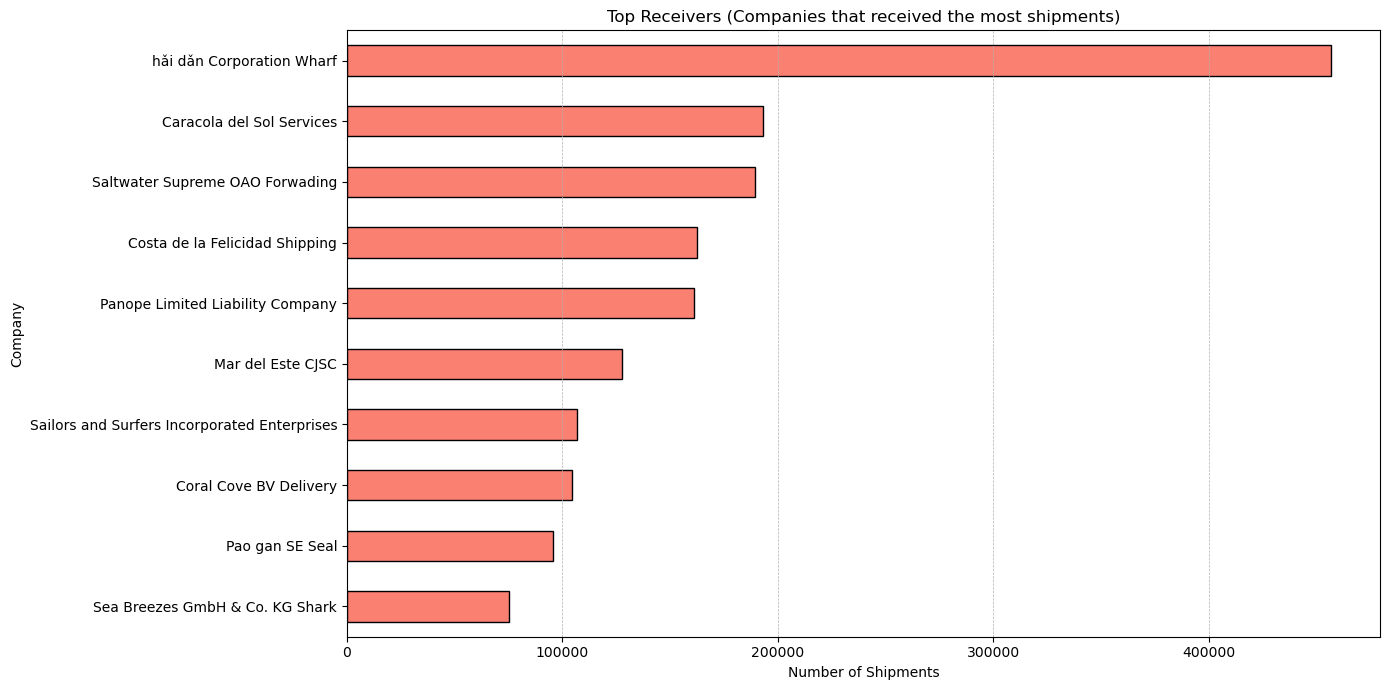

In [25]:
# Plotting the top receivers
plt.figure(figsize=(14,7))
top_receivers.plot(kind='barh', color='salmon', edgecolor='k')
plt.title("Top Receivers (Companies that received the most shipments)")
plt.xlabel("Number of Shipments")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.tight_layout()
plt.show()

In [26]:
# For each source, count the number of unique targets they've sent shipments to
unique_senders = edges.groupby('source')['target'].nunique()

# For each target, count the number of unique sources they've received shipments from
unique_receivers = edges.groupby('target')['source'].nunique()

# Getting the top senders and receivers based on unique connections
top_unique_senders = unique_senders.sort_values(ascending=False).head(10)
top_unique_receivers = unique_receivers.sort_values(ascending=False).head(10)

top_unique_senders, top_unique_receivers

(source
 Fresh Limited Liability Company               4028
 Zambezi Gorge  N.V. Transport                 2468
 Chhattisgarh   Marine ecology A/S Delivery    2052
 Estrella del Mar Seafarer                     1595
 Arunachal Pradesh s A/S Transport             1468
 Barents Sea Cod CJSC Export                   1174
 Caracola del Este Corporation Express         1140
 BlueWaterBites GmbH & Co. KG Export            781
 Maharashtra ers Incorporated Express           775
 Coastal Cruisers GmbH Logistics                763
 Name: target, dtype: int64,
 target
 hǎi dǎn Corporation Wharf                       5915
 Caracola del Sol Services                       3654
 Costa de la Felicidad Shipping                  2882
 Mar del Este CJSC                               2850
 Sailors and Surfers Incorporated Enterprises    2696
 Pao gan SE Seal                                 2111
 Coral Cove BV Delivery                          2067
 Selous Game Reserve  S.A. de C.V.               1938
 Ko

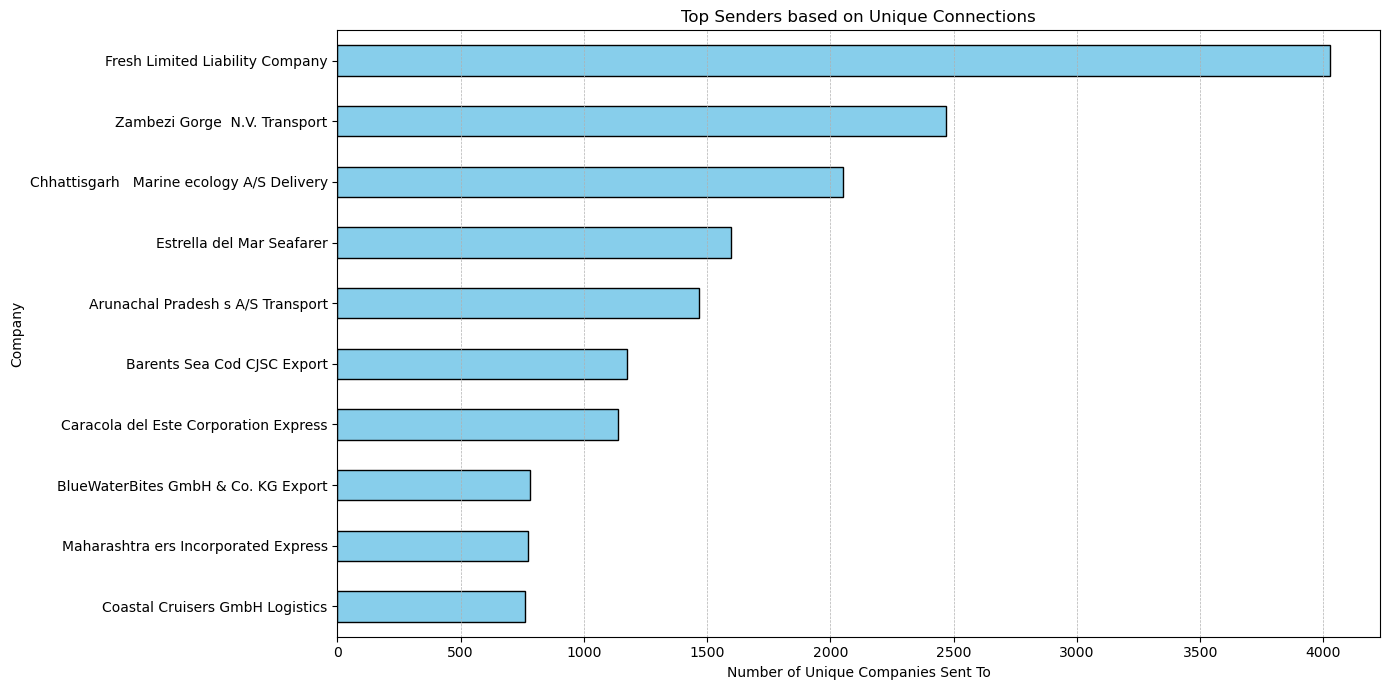

In [27]:
# Plotting the top senders based on unique connections
plt.figure(figsize=(14,7))
top_unique_senders.plot(kind='barh', color='skyblue', edgecolor='k')
plt.title("Top Senders based on Unique Connections")
plt.xlabel("Number of Unique Companies Sent To")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.tight_layout()
plt.show()

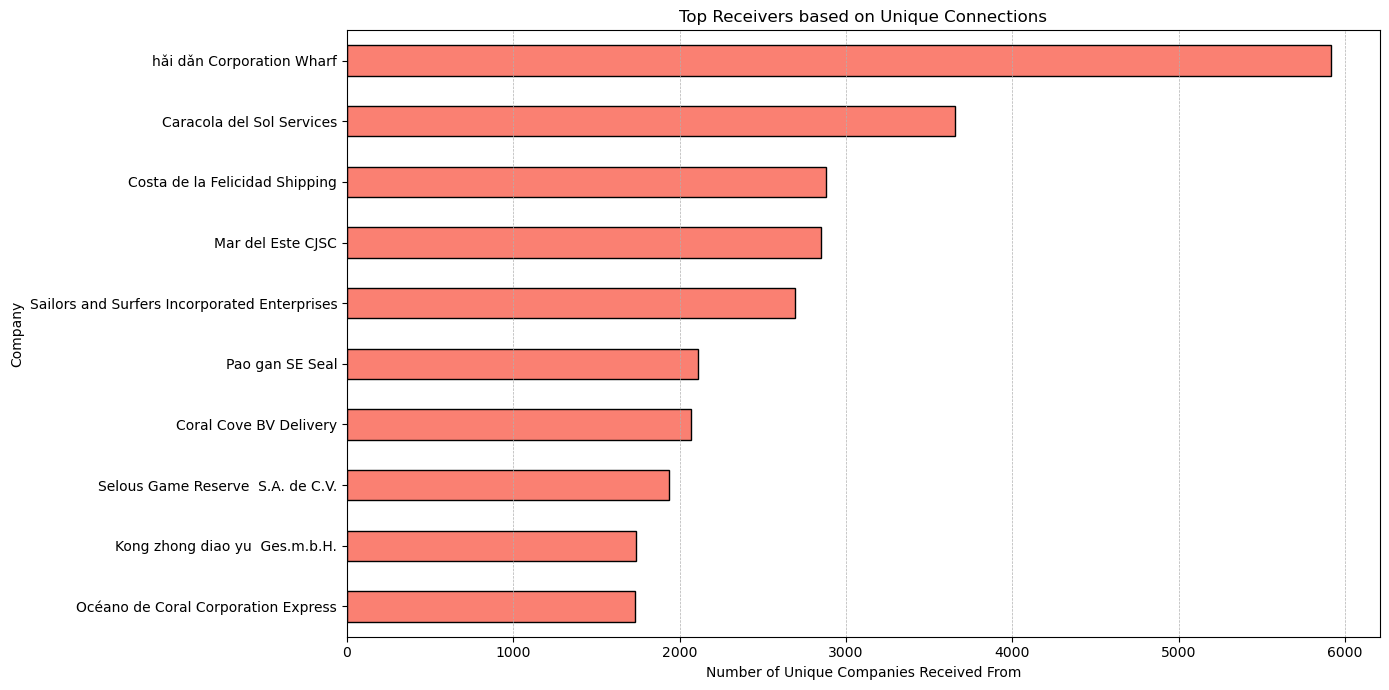

In [28]:
# Plotting the top receivers based on unique connections
plt.figure(figsize=(14,7))
top_unique_receivers.plot(kind='barh', color='salmon', edgecolor='k')
plt.title("Top Receivers based on Unique Connections")
plt.xlabel("Number of Unique Companies Received From")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.tight_layout()
plt.show()

In [1]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

graph = read_json_file("C:/Users/jonas/OneDrive/Dokumente/Bachelor/Thesis Project/thesis_project_jonas/data/raw/mc2_challenge_graph.json")

In [5]:
undirected_graph = graph.to_undirected()
nx.average_shortest_path_length(undirected_graph)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\jonas\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jonas\AppData\Local\Temp\ipykernel_3104\888973909.py", line 2, in <module>
    nx.average_shortest_path_length(undirected_graph)
  File "c:\Users\jonas\anaconda3\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 429, in average_shortest_path_length
    s = sum(l for u in G for l in path_length(u).values())
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jonas\anaconda3\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 429, in <genexpr>
    s = sum(l for u in G for l in path_length(u).values())
                                  ^^^^^^^^^^^^^^
  File "c:\Users\jonas\anaconda3\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 421, in path_length
    return nx.single_source_shortest_path_l

In [ ]:
# Load the data from the provided CSV file
edges_data = pd.read_csv('/mnt/data/edges_truncated.csv')

import networkx as nx

# Create a directed multigraph from the edge list data
G = nx.from_pandas_edgelist(edges_data, source='source', target='target', create_using=nx.MultiDiGraph())

# Find the number of strongly connected components
num_strongly_connected_components = nx.number_strongly_connected_components(G)

# Find the number of weakly connected components
num_weakly_connected_components = nx.number_weakly_connected_components(G)

# Find the isolated nodes
isolated_nodes = list(nx.isolates(G))

# Extract subgraphs from the main graph
subgraphs = list(nx.weakly_connected_components(G))

# Count isolated subgraphs
isolated_subgraphs = sum(1 for sg in subgraphs if len(sg) == 1 and list(sg)[0] in isolated_nodes)

In [ ]:
# Compute the condensation of the graph
condensation_graph = nx.condensation(G)

# Find nodes in the condensation graph with degree 0 or 1
potential_articulation_nodes = [node for node, deg in condensation_graph.degree() if deg <= 1]

# Extract the original nodes corresponding to these potential articulation points
subgraphs_with_potential_articulation_nodes = [condensation_graph.nodes[node]['members'] for node in potential_articulation_nodes]

# Flatten the list and remove duplicates
subgraphs_with_potential_articulation_nodes = [item for sublist in subgraphs_with_potential_articulation_nodes for item in sublist]

len(subgraphs_with_potential_articulation_nodes), subgraphs_with_potential_articulation_nodes[:10]  # Display first 10 for reference


In [3]:
condensed_data = pd.read_csv("C:/Users/jonas/OneDrive/Dokumente/Bachelor/Thesis Project/thesis_project_jonas/data/processed/condensed_edges.csv")

# Compute the out-degree for each node
out_degree = condensed_data['source'].value_counts()

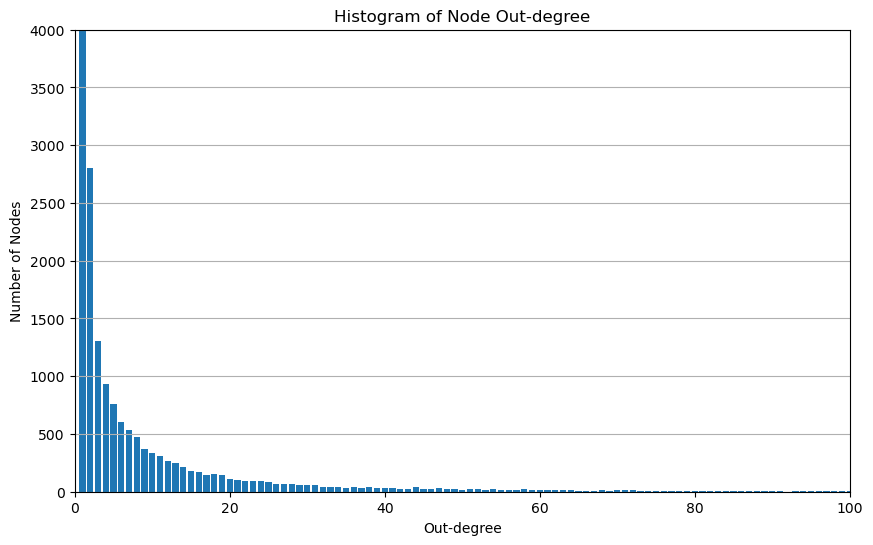

In [4]:
# Plot the histogram with specified axis limits
plt.figure(figsize=(10, 6))
plt.hist(out_degree, bins=range(1, out_degree.max() + 2), align='left', rwidth=0.8)
plt.xlabel('Out-degree')
plt.ylabel('Number of Nodes')
plt.title('Histogram of Node Out-degree')
plt.grid(axis='y')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(0, 4000)

plt.show()

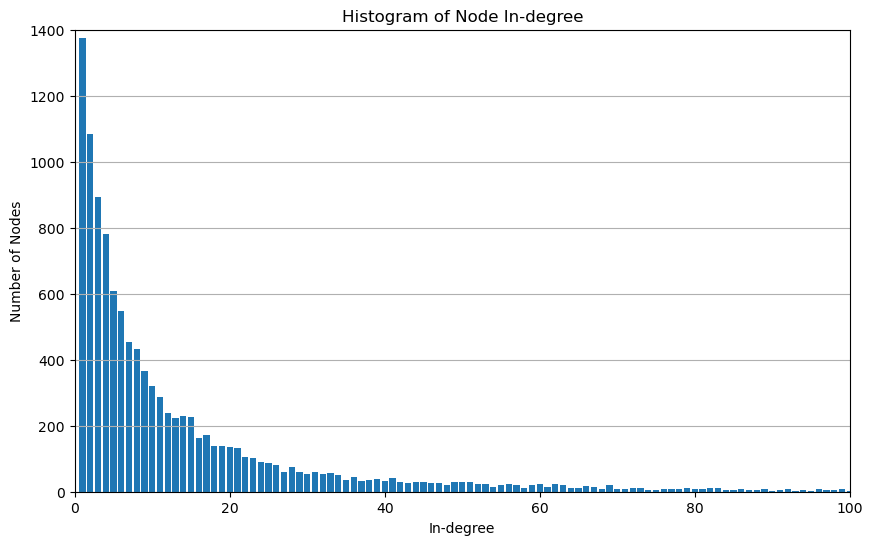

In [7]:
# Compute the in-degree for each node
in_degree = condensed_data['target'].value_counts()

# Plot the histogram with specified axis limits
plt.figure(figsize=(10, 6))
plt.hist(in_degree, bins=range(1, in_degree.max() + 2), align='left', rwidth=0.8)
plt.xlabel('In-degree')
plt.ylabel('Number of Nodes')
plt.title('Histogram of Node In-degree')
plt.grid(axis='y')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(0, 1400)

plt.show()

In [8]:
# Compute the desired percentiles and statistics for the out-degree distribution
out_stats = {
    "minimum" : out_degree.min(),                # Minimum
    "first" : out_degree.quantile(0.25),      # 25th percentile
    "median" : out_degree.median(),            # Median
    "third" : out_degree.quantile(0.75),      # 75th percentile
    "maximum" : out_degree.max()                # Maximum
}

out_stats

{'minimum': 1, 'first': 1.0, 'median': 1.0, 'third': 3.0, 'maximum': 2987}

In [9]:
# Compute the desired percentiles and statistics for the out-degree distribution
in_stats = {
    "minimum" : in_degree.min(),                # Minimum
    "first" : in_degree.quantile(0.25),      # 25th percentile
    "median" : in_degree.median(),            # Median
    "third" : in_degree.quantile(0.75),      # 75th percentile
    "maximum" : in_degree.max()                # Maximum
}

in_stats

{'minimum': 1, 'first': 3.0, 'median': 7.0, 'third': 18.0, 'maximum': 5728}

In [10]:
# Create a graph from the condensed data
G = nx.from_pandas_edgelist(condensed_data, 'source', 'target')

# Find all cliques in the graph
cliques = list(nx.find_cliques(G))

# Count the number of cliques
num_cliques = len(cliques)
num_cliques

602966

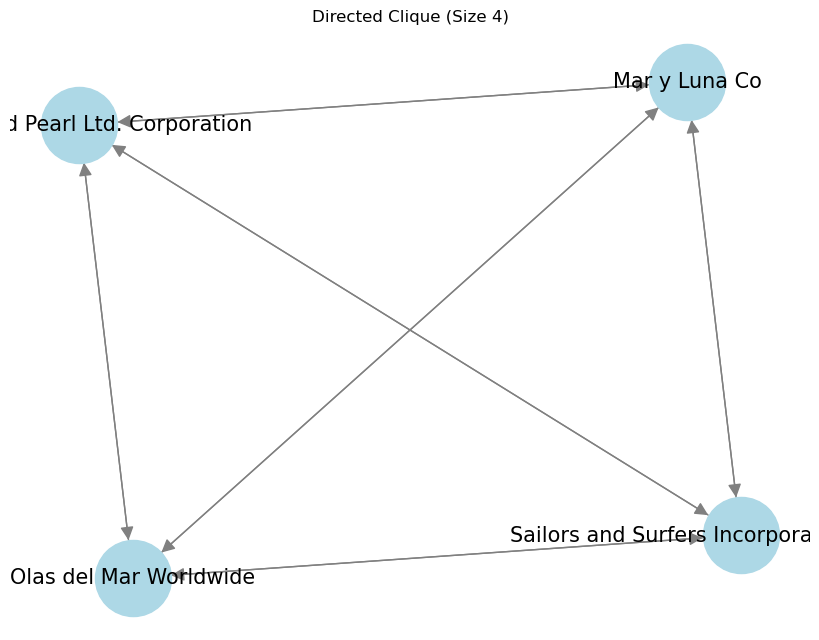

In [11]:
# Find a medium-sized clique (for example, a clique of size 4)
clique_of_interest = next(clique for clique in cliques if len(clique) == 4)

# Create a directed subgraph for the selected clique
subgraph_directed = G.subgraph(clique_of_interest).copy(as_view=False).to_directed()

# Plot the directed clique
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph_directed)
nx.draw(subgraph_directed, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=15, 
        arrowsize=20, edge_color='gray')
plt.title('Directed Clique (Size 4)')
plt.show()

In [12]:
# Find instances where the source and target columns have the same company name
self_trades = condensed_data[condensed_data['source'] == condensed_data['target']]

self_trades_count = len(self_trades)
self_trades_count

875

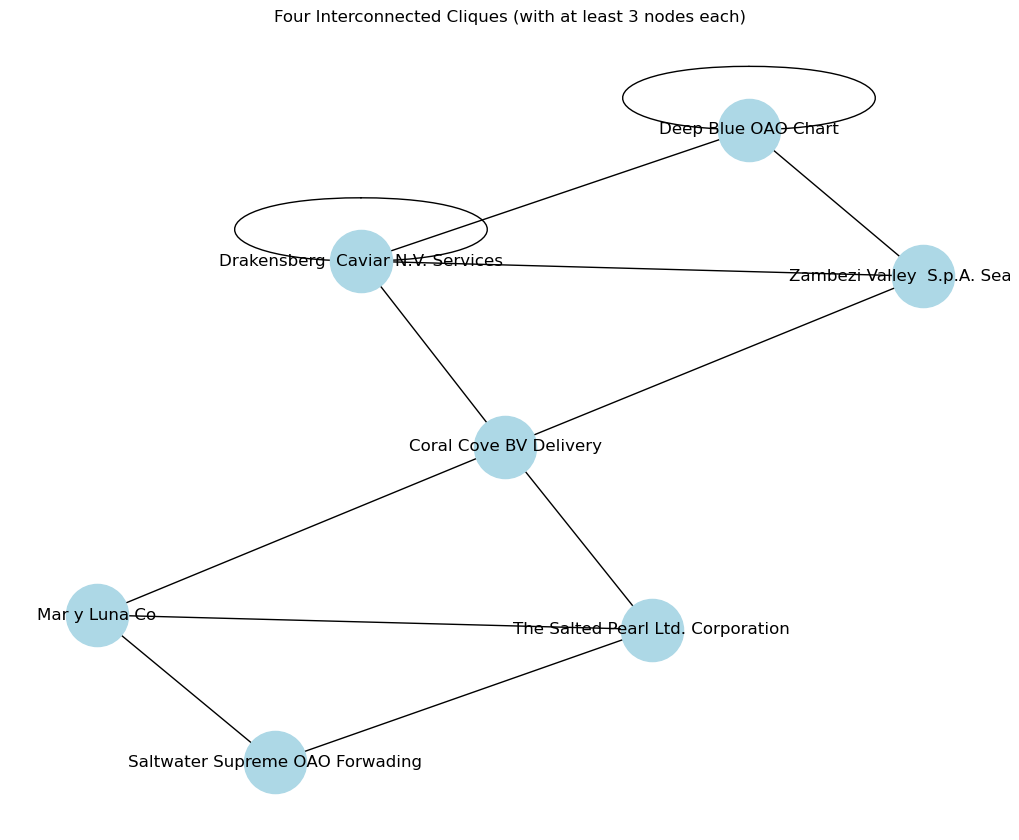

In [14]:
# Filter cliques to consider only those with 3 or more nodes
large_cliques = [clique for clique in cliques if len(clique) >= 3]

# Identify interconnected cliques
selected_cliques = [large_cliques[0]]
for clique in large_cliques[1:]:
    for selected_clique in selected_cliques:
        if any(node in selected_clique for node in clique):
            selected_cliques.append(clique)
            break
    if len(selected_cliques) == 4:  # We want only 4 interconnected cliques
        break

# Create a subgraph containing the nodes from the selected cliques
nodes_in_selected_cliques = [node for clique in selected_cliques for node in clique]
subgraph_interconnected_large = G.subgraph(nodes_in_selected_cliques)

# Plot the interconnected cliques
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph_interconnected_large)
nx.draw(subgraph_interconnected_large, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title('Four Interconnected Cliques (with at least 3 nodes each)')
plt.show()

In [ ]:
#TODO
#graph weiter analysieren
#googlen wie man synthetische graph datensets erstellt (chatgpt)
#faker lernen
#anfangen ein datenset zu erstellen 
#multigraph graph embedding recherchieren

In [5]:
# Initialize an empty list to store the condensed edges
condensed_edge_list = []

# Iterate over unique pairs of nodes and sum the weights
for (src, tgt), group in edges_truncated.groupby(['source', 'target']):
    total_weight = group['weightkg'].sum()
    condensed_edge_list.append((src, tgt, total_weight))

# Convert the list to a DataFrame
condensed_edges_df = pd.DataFrame(condensed_edge_list, columns=['source', 'target', 'total_weight'])

# Save the condensed_edges_df DataFrame to a CSV file
condensed_edges_df.to_csv("C:/Users/jonas/OneDrive/Dokumente/Bachelor/Thesis Project/thesis_project_jonas/data/processed/edges_aggregated.csv", index=False)

condensed_edges_df.head()

,source,target,total_weight
0,Direct Herring Company Transit,-1327,106645
1,Direct Herring Company Transit,-5678,17400
2,Direct Herring Company Transit,Adriatic Catch Ges.m.b.H. Marine biology,23155
3,Direct Herring Company Transit,Adriatic Tuna Seabass BV Transit,91435
4,Direct Herring Company Transit,Caracola Azul NV Nautical,288485


In [7]:
# Load the condensed data into a NetworkX graph
G = nx.from_pandas_edgelist(condensed_edges, 'source', 'target', ['weightkg'])


# Convert the graph to a directed graph
G_directed = G.to_directed()

# Find the directed cycles
cycles = list(nx.simple_cycles(G_directed))

num_cycles = len(cycles)
num_cycles